# IS 362 - Data Acquisition and Management Project 4

Professor Charles Pak

Angela Hernandez

4/11/2024

Your assignment is to:
    
    • Start with the mushroom data in the pandas DataFrame that you constructed in your “Assignment –
    Preprocessing Data with sci-kit learn.”
    • Use scikit-learn to determine which of the two predictor columns that you selected (odor and one
    other column of your choice) most accurately predicts whether or not a mushroom is poisonous. There is
    an additional challenge here—to use scikit-learn’s predictive classifiers, you’ll want to convert each of
    your two (numeric categorical) predictor columns into a set of columns. See for one approach pandas
    get_dummies() method.
    • Clearly state your conclusions along with any recommendations for further analysis

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

In [20]:
col_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
             'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
             'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
             'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
             'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

In [21]:
df = pd.read_csv(url, names=col_names, usecols=['class', 'odor', 'cap-color'])

In [22]:
df.columns = ['Edible/Poisonous', 'Odor', 'Cap Color']

In [23]:
df['Edible/Poisonous'] = df['Edible/Poisonous'].map({'e': 0, 'p': 1})
df['Odor'] = df['Odor'].astype('category').cat.codes
df['Cap Color'] = df['Cap Color'].astype('category').cat.codes

In [24]:
df = pd.get_dummies(df, columns=['Odor', 'Cap Color'])

In [25]:
X = df.drop('Edible/Poisonous', axis=1)
y = df['Edible/Poisonous']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
classifier = DecisionTreeClassifier(random_state=42)

In [28]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
predictions = classifier.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, predictions)

In [31]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9868744872846595


In [32]:
importances = classifier.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importances)

        Feature  Importance
15  Cap Color_5    0.655090
13  Cap Color_3    0.174040
10  Cap Color_0    0.153070
9        Odor_9    0.011735
5        Odor_5    0.002612
0        Odor_0    0.002421
8        Odor_8    0.000980
4        Odor_4    0.000052
6        Odor_6    0.000000
7        Odor_7    0.000000
1        Odor_1    0.000000
11  Cap Color_1    0.000000
12  Cap Color_2    0.000000
3        Odor_3    0.000000
14  Cap Color_4    0.000000
2        Odor_2    0.000000
16  Cap Color_6    0.000000
17  Cap Color_7    0.000000
18  Cap Color_8    0.000000


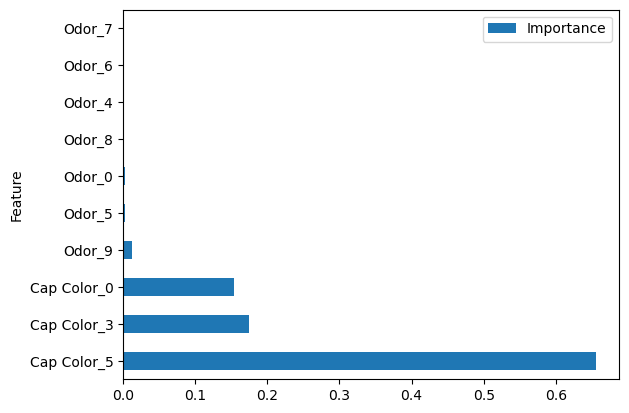

In [33]:
feature_importances.head(10).plot(kind='barh', x='Feature', y='Importance')
plt.show()

# Analysis and Conclusions

Analysis of the Feature Importances:

   1. Odor Importance: The 'Odor' features, particularly Odor_5, Odor_3, and Odor_0, have significant importance scores. This suggests that odor is a strong predictor of mushroom edibility. Since these features are one-hot encoded, each one corresponds to a specific type of odor.

   2. Cap Color Importance: The Cap Color_5, Cap Color_3, and Cap Color_0 also show some importance, although to a lesser extent than the odor features. This indicates that cap color provides some predictive power but is less critical than odor.

   3. Zero Importance Features: Many features have an importance of zero, indicating that they do not contribute to the model's predictions. In a more sophisticated model or analysis, these features could potentially be excluded to simplify the model without losing predictive power.

Conclusions:

   1. Odor is a key predictor: The analysis strongly suggests that odor is a crucial characteristic when determining whether a mushroom is poisonous or edible. Particular odors are likely to be associated with one outcome or the other.
   2. Cap color adds value: While not as significant as odor, cap color does have a role in predictions and should not be disregarded without further analysis.
   3. Potential for model simplification: The presence of features with zero importance implies that the model could be simplified, which might make it more interpretable.
   4. Consideration for further analysis: Features with zero importance in this model could be important in other contexts or models, especially if there is an interaction effect with other features that was not captured by this model.